# Zadanie 5


Celem ćwiczenia jest implementacja perceptronu wielowarstwowego oraz wybranego algorytmu optymalizacji gradientowej z algorytmem propagacji wstecznej.

Następnie należy wytrenować perceptron wielowarstwowy do klasyfikacji zbioru danych [MNIST](http://yann.lecun.com/exdb/mnist/). Zbiór MNIST dostępny jest w pakiecie `scikit-learn`.

Punktacja:
1. Implementacja propagacji do przodu (`forward`) [1 pkt]
2. Implementacja wstecznej propagacji (zademonstrowana na bramce XOR) (`backward`) [2 pkt]
3. Przeprowadzenie eksperymentów na zbiorze MNIST, w tym:
    1. Porównanie co najmniej dwóch architektur sieci [1 pkt]
    2. Przetestowanie każdej architektury na conajmniej 3 ziarnach [1 pkt]
    3. Wnioski [1.5 pkt]
4. Jakość kodu [0.5 pkt]

Polecane źródła - teoria + intuicja:
1. [Karpathy, CS231n Winter 2016: Lecture 4: Backpropagation, Neural Networks 1](https://www.youtube.com/watch?v=i94OvYb6noo&ab_channel=AndrejKarpathy)
2. [3 Blude one Brown, Backpropagation calculus | Chapter 4, Deep learning
](https://www.youtube.com/watch?v=tIeHLnjs5U8&t=4s&ab_channel=3Blue1Brown)


In [25]:
from layers import FullyConnected, Tanh, Softmax, ReLU
from network import Loss, Network
from keras.datasets import mnist
from keras.utils import set_random_seed
from utils import (one_hot_encode, cross_entropy_loss, cross_entropy_loss_derivative,
                   squared_error, squared_error_derivative)
from optimizers import SimpleSGD, MomentumSGD
import matplotlib.pyplot as plt

# Eksperymenty

In [26]:
set_random_seed(123)
(x_train_1, y_train_1), (x_test_1, y_test_1) = mnist.load_data()
set_random_seed(12)
(x_train_2, y_train_2), (x_test_2, y_test_2) = mnist.load_data()
set_random_seed(13)
(x_train_3, y_train_3), (x_test_3, y_test_3) = mnist.load_data()

# Normalize input
x_train_1 = x_train_1.reshape((60000, 28 * 28))
x_train_1 = x_train_1.astype('float32') / 255
x_test_1 = x_test_1.reshape(((10000, 28 * 28)))
x_test_1 = x_test_1.astype('float32') / 255

x_train_2 = x_train_2.reshape((60000, 28 * 28))
x_train_2 = x_train_2.astype('float32') / 255
x_test_2 = x_test_2.reshape(((10000, 28 * 28)))
x_test_2 = x_test_2.astype('float32') / 255

x_train_3 = x_train_3.reshape((60000, 28 * 28))
x_train_3 = x_train_3.astype('float32') / 255
x_test_3 = x_test_3.reshape(((10000, 28 * 28)))
x_test_3 = x_test_3.astype('float32') / 255
    
# One hot encoding
y_train_1 = one_hot_encode(y_train_1)
y_test_1 = one_hot_encode(y_test_1)
y_train_2 = one_hot_encode(y_train_2)
y_test_2 = one_hot_encode(y_test_2)
y_train_3 = one_hot_encode(y_train_3)
y_test_3 = one_hot_encode(y_test_3)

# Net1 - Tanh activation + MSE

In [27]:
layers11 = [FullyConnected(input_size=784, output_size=32), Tanh(),
              FullyConnected(input_size=32, output_size=16), Tanh(),
              FullyConnected(input_size=16, output_size=10), Tanh()]
loss11 = Loss(squared_error, squared_error_derivative)
optimizer_with_momentum11 = MomentumSGD(alpha=0.1, beta=0.9, decay=0.1)

## Net1 Seed1

In [28]:
net11 = Network(layers11)
net11.compile(loss11, optimizer_with_momentum11)

In [29]:
history_11 = net11.fit(x_train_1, y_train_1, epochs=5, batch_size=128, verbose=1)
accuracy11_eval = net11.evaluate(x_test_1, y_test_1)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.1564	Accuracy: 93.75%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.1171	Accuracy: 93.75%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.0911	Accuracy: 98.44%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.1291	Accuracy: 94.53%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.1318	Accuracy: 92.97%


In [30]:
loss_history_11 = history_11["loss"]
accuracy_history_11 = history_11["accuracy"]

loss11 = [(x+y)/2 for x, y, in zip(list(loss_history_11.values())[::2], list(loss_history_11.values())[1::2]) for _ in range(2)]
accuracy11_history_11_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_11.values())[::2], list(accuracy_history_11.values())[1::2]) for _ in range(2)]

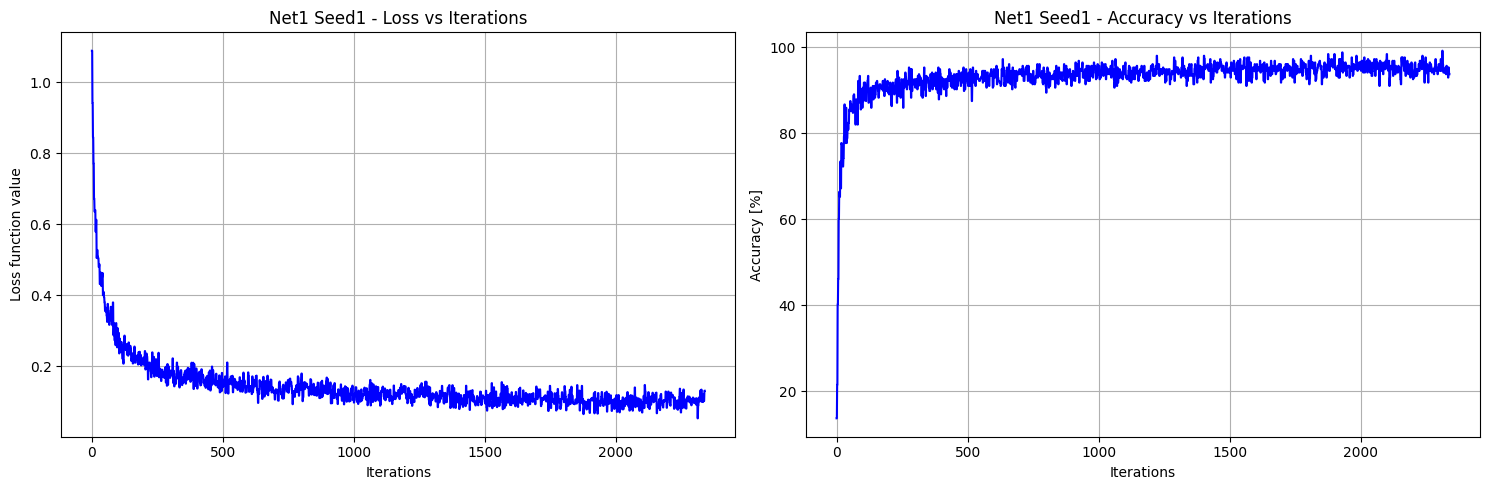

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax1.plot(loss_history_11.keys(), loss11, color='blue')
ax1.set_title("Net1 Seed1 - Loss vs Iterations")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss function value")
ax1.grid()

# Plot data on the second subplot
ax2.plot(accuracy_history_11.keys(), accuracy11_history_11_x, color='blue')
ax2.set_title("Net1 Seed1 - Accuracy vs Iterations")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Accuracy [%]")
ax2.grid()

plt.tight_layout()
plt.show()

In [32]:
print(f"Net1 Seed1 test accuracy: {accuracy11_eval*100:.2f}%")

Net1 Seed1 test accuracy: 95.00%


# Net1 Seed2

In [33]:
layers12 = [FullyConnected(input_size=784, output_size=32), Tanh(),
              FullyConnected(input_size=32, output_size=16), Tanh(),
              FullyConnected(input_size=16, output_size=10), Tanh()]
loss12 = Loss(squared_error, squared_error_derivative)
optimizer12 = SimpleSGD(learning_rate=0.1, decay=0.1)
net12 = Network(layers12)
net12.compile(loss12, optimizer12)

In [34]:
history_12 = net12.fit(x_train_2, y_train_2, epochs=5, batch_size=128, verbose=1)
accuracy12 = net12.evaluate(x_test_2, y_test_2)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.2971	Accuracy: 89.06%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.2426	Accuracy: 89.06%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.1906	Accuracy: 94.53%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.1941	Accuracy: 90.62%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.1918	Accuracy: 90.62%


In [35]:
loss_history_12 = history_12["loss"]
accuracy_history_12 = history_12["accuracy"]

loss12 = [(x+y)/2 for x, y, in zip(list(loss_history_12.values())[::2], list(loss_history_12.values())[1::2]) for _ in range(2)]
accuracy12_history_12_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_12.values())[::2], list(accuracy_history_12.values())[1::2]) for _ in range(2)]

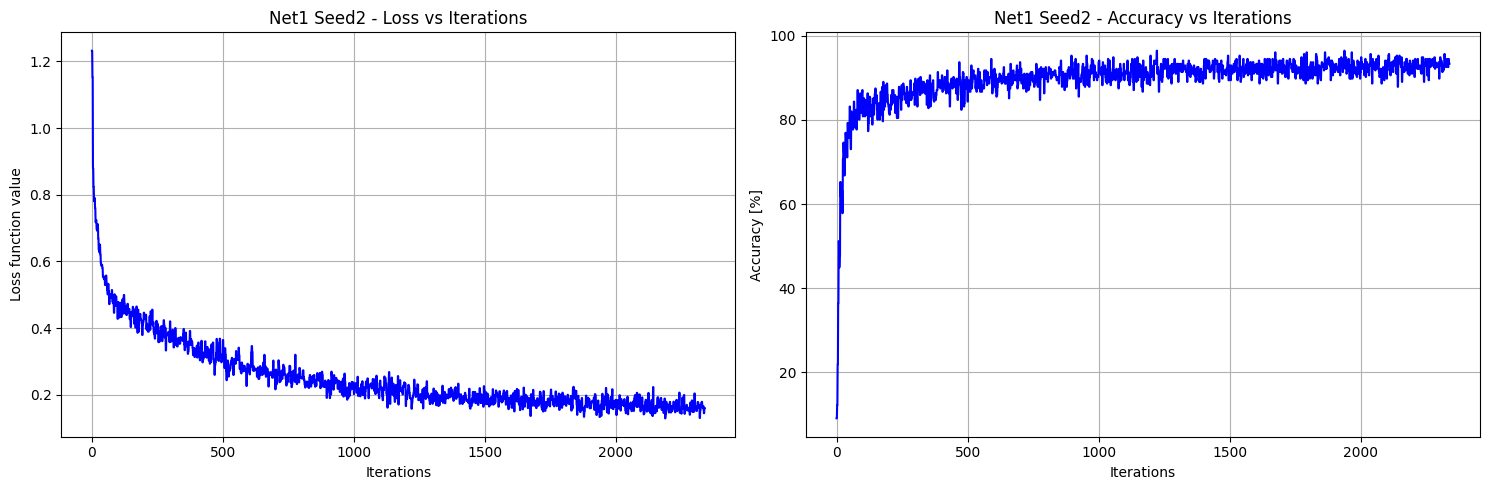

In [36]:
fig2, (ax12, ax22) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax12.plot(loss_history_12.keys(), loss12, color='blue')
ax12.set_title("Net1 Seed2 - Loss vs Iterations")
ax12.set_xlabel("Iterations")
ax12.set_ylabel("Loss function value")
ax12.grid()

# Plot data on the second subplot
ax22.plot(accuracy_history_12.keys(), accuracy12_history_12_x, color='blue')
ax22.set_title("Net1 Seed2 - Accuracy vs Iterations")
ax22.set_xlabel("Iterations")
ax22.set_ylabel("Accuracy [%]")
ax22.grid()

plt.tight_layout()
plt.show()

In [37]:
print(f"Net1 Seed2 accuracy: {accuracy12*100:.2f}%")

Net1 Seed2 accuracy: 93.13%


# Net1 Seed3

In [42]:
layers13 = [FullyConnected(input_size=784, output_size=32), Tanh(),
              FullyConnected(input_size=32, output_size=16), Tanh(),
              FullyConnected(input_size=16, output_size=10), Tanh()]
loss13 = Loss(squared_error, squared_error_derivative)
optimizer_with_momentum13 = MomentumSGD(alpha=1e-2, beta=0.9, decay=0.1)
net13 = Network(layers13)
net13.compile(loss13, optimizer_with_momentum13)

In [43]:
history_13 = net13.fit(x_train_3, y_train_3, epochs=5, batch_size=128, verbose=1)
accuracy13 = net13.evaluate(x_test_3, y_test_3)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.3234	Accuracy: 87.50%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.2551	Accuracy: 87.50%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.2013	Accuracy: 89.84%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.2072	Accuracy: 89.84%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.1579	Accuracy: 93.75%


In [44]:
loss_history_13 = history_13["loss"]
accuracy_history_13 = history_13["accuracy"]

loss13 = [(x+y)/2 for x, y, in zip(list(loss_history_13.values())[::2], list(loss_history_13.values())[1::2]) for _ in range(2)]
accuracy13_history_13_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_13.values())[::2], list(accuracy_history_13.values())[1::2]) for _ in range(2)]

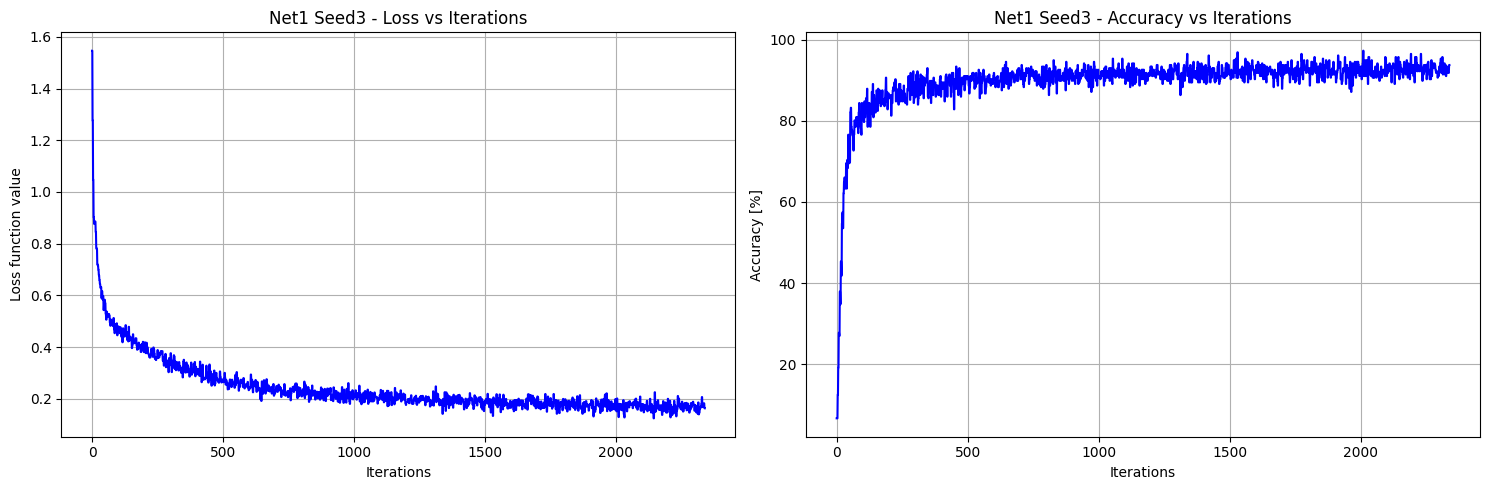

In [45]:
fig3, (ax13, ax23) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax13.plot(loss_history_13.keys(), loss13, color='blue')
ax13.set_title("Net1 Seed3 - Loss vs Iterations")
ax13.set_xlabel("Iterations")
ax13.set_ylabel("Loss function value")
ax13.grid()

# Plot data on the second subplot
ax23.plot(accuracy_history_13.keys(), accuracy13_history_13_x, color='blue')
ax23.set_title("Net1 Seed3 - Accuracy vs Iterations")
ax23.set_xlabel("Iterations")
ax23.set_ylabel("Accuracy [%]")
ax23.grid()

plt.tight_layout()
plt.show()

In [46]:
print(f"Net1 Seed3 accuracy: {accuracy13*100:.2f}%")

Net1 Seed3 accuracy: 93.07%


# Net2 - Softmax + Categorical Cross Entropy

## Net2  Seed1

In [47]:
layers21 = [FullyConnected(input_size=784, output_size=512), ReLU(),
               FullyConnected(input_size=512, output_size=10), Tanh(),
               Softmax()]
loss21 = Loss(cross_entropy_loss, cross_entropy_loss_derivative)
optimizer_with_momentum21 = MomentumSGD(alpha=0.1, beta=0.9, decay=0.1)
net21 = Network(layers21)
net21.compile(loss21, optimizer_with_momentum21)

In [48]:
history_21 = net21.fit(x_train_1, y_train_1, epochs=5, batch_size=128, verbose=1)
accuracy21 = net21.evaluate(x_test_1, y_test_1)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.7503	Accuracy: 95.31%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.6910	Accuracy: 97.66%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.6737	Accuracy: 97.66%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.6901	Accuracy: 96.88%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.6508	Accuracy: 99.22%


In [49]:
loss_history_21 = history_21["loss"]
accuracy_history_21 = history_21["accuracy"]

loss21 = [(x+y)/2 for x, y, in zip(list(loss_history_21.values())[::2], list(loss_history_21.values())[1::2]) for _ in range(2)]
accuracy21_history_21_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_21.values())[::2], list(accuracy_history_21.values())[1::2]) for _ in range(2)]

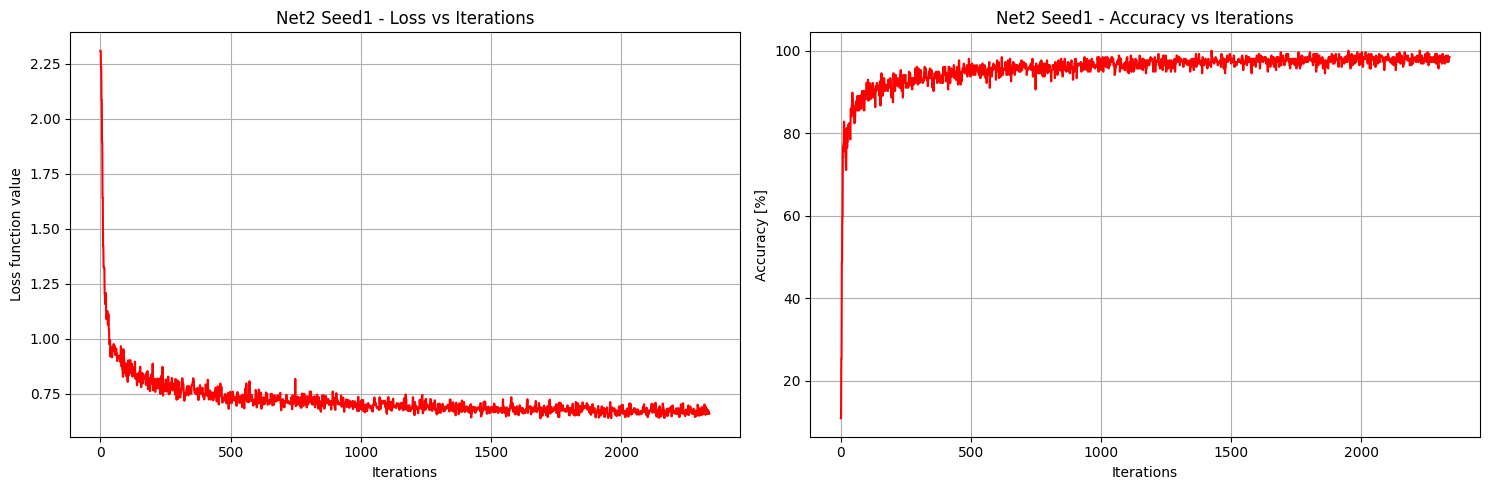

In [50]:
fig4, (ax31, ax32) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax31.plot(loss_history_21.keys(), loss21, color='red')
ax31.set_title("Net2 Seed1 - Loss vs Iterations")
ax31.set_xlabel("Iterations")
ax31.set_ylabel("Loss function value")
ax31.grid()

# Plot data on the second subplot
ax32.plot(accuracy_history_21.keys(), accuracy21_history_21_x, color='red')
ax32.set_title("Net2 Seed1 - Accuracy vs Iterations")
ax32.set_xlabel("Iterations")
ax32.set_ylabel("Accuracy [%]")
ax32.grid()

plt.tight_layout()
plt.show()

In [51]:
print(f"Net2 Seed1 accuracy: {accuracy21*100:.2f}%")

Net2 Seed1 accuracy: 97.47%


## Net2 Seed2

In [52]:
layers22 = [FullyConnected(input_size=784, output_size=512), ReLU(),
               FullyConnected(input_size=512, output_size=10), Tanh(),
               Softmax()]
loss22 = Loss(cross_entropy_loss, cross_entropy_loss_derivative)
optimizer22 = SimpleSGD(learning_rate=0.1, decay=0.1)
net22 = Network(layers22)
net22.compile(loss22, optimizer22)

In [53]:
history_22 = net22.fit(x_train_2, y_train_2, epochs=5, batch_size=128, verbose=1)
accuracy22 = net22.evaluate(x_test_2, y_test_2)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.8874	Accuracy: 89.06%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.8484	Accuracy: 92.19%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.7570	Accuracy: 94.53%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.7887	Accuracy: 93.75%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.7715	Accuracy: 92.19%


In [54]:
loss_history_22 = history_22["loss"]
accuracy_history_22 = history_22["accuracy"]

loss22 = [(x+y)/2 for x, y, in zip(list(loss_history_22.values())[::2], list(loss_history_22.values())[1::2]) for _ in range(2)]
accuracy22_history_22_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_22.values())[::2], list(accuracy_history_22.values())[1::2]) for _ in range(2)]

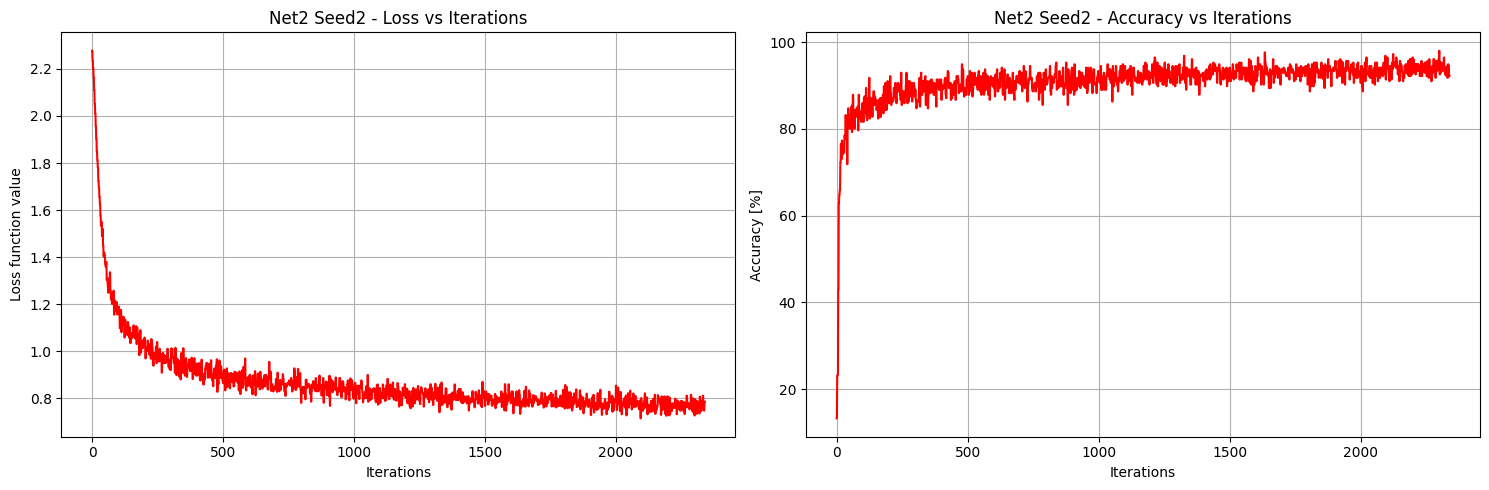

In [56]:
fig5, (ax41, ax42) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax41.plot(loss_history_22.keys(), loss22, color='red')
ax41.set_title("Net2 Seed2 - Loss vs Iterations")
ax41.set_xlabel("Iterations")
ax41.set_ylabel("Loss function value")
ax41.grid()

# Plot data on the second subplot
ax42.plot(accuracy_history_22.keys(), accuracy22_history_22_x, color='red')
ax42.set_title("Net2 Seed2 - Accuracy vs Iterations")
ax42.set_xlabel("Iterations")
ax42.set_ylabel("Accuracy [%]")
ax42.grid()

plt.tight_layout()
plt.show()

In [87]:
print(f"Net2 Seed2 test accuracy: {accuracy22*100:.2f}%")

Net2 Seed2 test accuracy: 93.92%


## Net2 Seed3

In [61]:
layers23 = [FullyConnected(input_size=784, output_size=512), ReLU(),
               FullyConnected(input_size=512, output_size=10), Tanh(),
               Softmax()]
loss23 = Loss(cross_entropy_loss, cross_entropy_loss_derivative)
optimizer_with_momentum23 = MomentumSGD(alpha=1e-2, beta=0.9, decay=0.1)
net23 = Network(layers23)
net23.compile(loss23, optimizer_with_momentum23)

In [62]:
history_23 = net23.fit(x_train_3, y_train_3, epochs=5, batch_size=128, verbose=1)
accuracy23 = net23.evaluate(x_test_3, y_test_3)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 0.8893	Accuracy: 92.19%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 0.8944	Accuracy: 89.84%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 0.7257	Accuracy: 96.09%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 0.8249	Accuracy: 89.06%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.7492	Accuracy: 96.09%


In [63]:
loss_history_23 = history_23["loss"]
accuracy_history_23 = history_23["accuracy"]

loss23 = [(x+y)/2 for x, y, in zip(list(loss_history_23.values())[::2], list(loss_history_23.values())[1::2]) for _ in range(2)]
accuracy23_history_23_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_23.values())[::2], list(accuracy_history_23.values())[1::2]) for _ in range(2)]

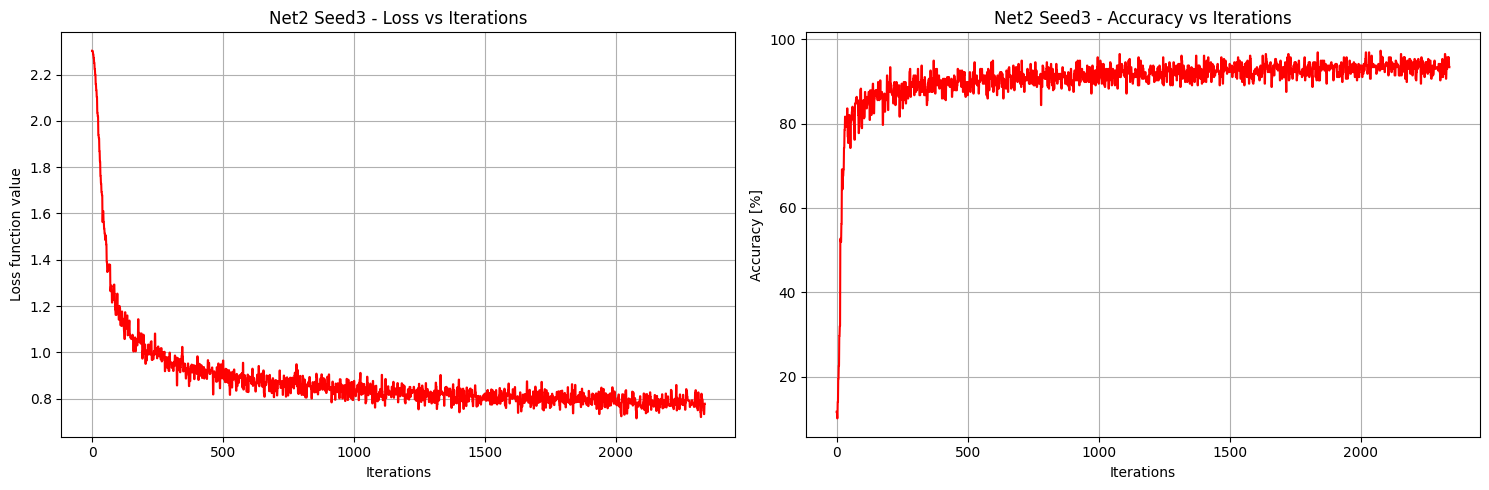

In [64]:
fig6, (ax51, ax52) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax51.plot(loss_history_23.keys(), loss23, color='red')
ax51.set_title("Net2 Seed3 - Loss vs Iterations")
ax51.set_xlabel("Iterations")
ax51.set_ylabel("Loss function value")
ax51.grid()

# Plot data on the second subplot
ax52.plot(accuracy_history_23.keys(), accuracy23_history_23_x, color='red')
ax52.set_title("Net2 Seed3 - Accuracy vs Iterations")
ax52.set_xlabel("Iterations")
ax52.set_ylabel("Accuracy [%]")
ax52.grid()

plt.tight_layout()
plt.show()

In [86]:
print(f"Net2 Seed3 test accuracy: {accuracy23*100:.2f}%")

Net2 Seed3 test accuracy: 93.48%


# Net3 - Softmax + Categorical Cross-Entropy with poor hyperparameters

In [82]:
layers31 = [FullyConnected(input_size=784, output_size=512), ReLU(),
               FullyConnected(input_size=512, output_size=10), Tanh(),
               Softmax()]
loss31 = Loss(cross_entropy_loss, cross_entropy_loss_derivative)
optimizer31 = SimpleSGD(learning_rate=1e-2, decay=0.1)
net31 = Network(layers31)
net31.compile(loss31, optimizer31)

In [83]:
history_31 = net31.fit(x_train_1, y_train_1, epochs=5, batch_size=128, verbose=1)
accuracy31 = net31.evaluate(x_test_1, y_test_1)

Epoch 1/5
468/468 |====================================================================================================| 100.0% Loss: 1.4213	Accuracy: 79.69%
Epoch 2/5
468/468 |====================================================================================================| 100.0% Loss: 1.1785	Accuracy: 82.03%
Epoch 3/5
468/468 |====================================================================================================| 100.0% Loss: 1.0838	Accuracy: 90.62%
Epoch 4/5
468/468 |====================================================================================================| 100.0% Loss: 1.0245	Accuracy: 88.28%
Epoch 5/5
468/468 |====================================================================================================| 100.0% Loss: 0.9575	Accuracy: 88.28%


In [84]:
loss_history_31 = history_31["loss"]
accuracy_history_31 = history_31["accuracy"]

loss31 = [(x+y)/2 for x, y, in zip(list(loss_history_31.values())[::2], list(loss_history_31.values())[1::2]) for _ in range(2)]
accuracy31_history_31_x = [100*((x+y)/2) for x, y, in zip(list(accuracy_history_31.values())[::2], list(accuracy_history_31.values())[1::2]) for _ in range(2)]

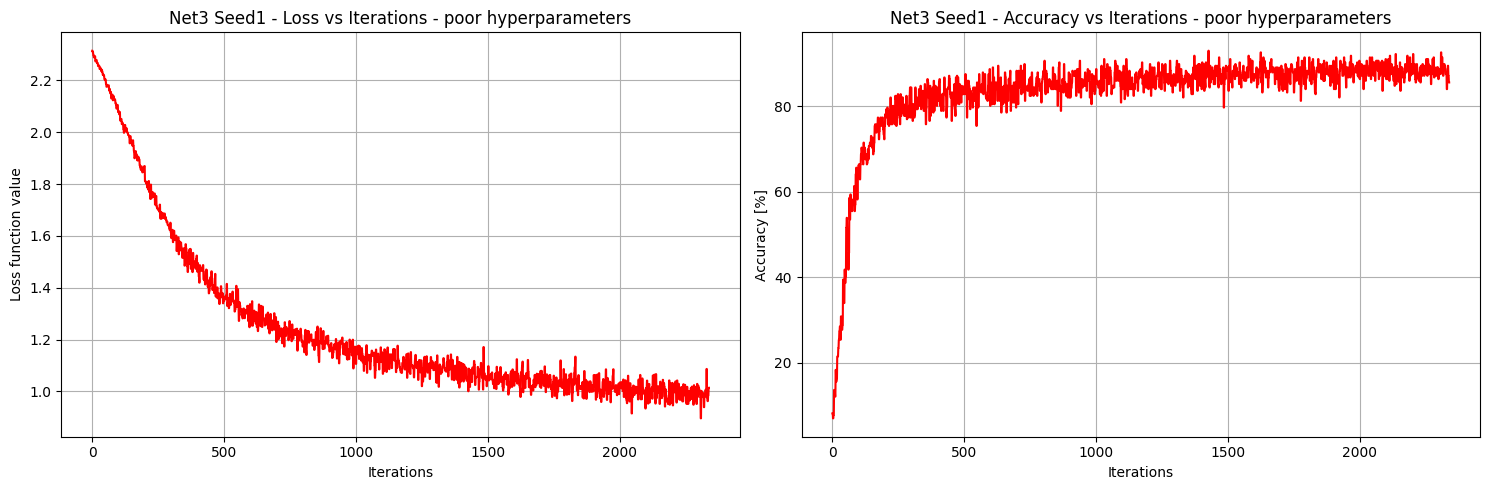

In [85]:
fig7, (ax61, ax62) = plt.subplots(1, 2, figsize=(15, 5))

# Plot data on the first subplot
ax61.plot(loss_history_31.keys(), loss31, color='red')
ax61.set_title("Net3 Seed1 - Loss vs Iterations - poor hyperparameters")
ax61.set_xlabel("Iterations")
ax61.set_ylabel("Loss function value")
ax61.grid()

# Plot data on the second subplot
ax62.plot(accuracy_history_31.keys(), accuracy31_history_31_x, color='red')
ax62.set_title("Net3 Seed1 - Accuracy vs Iterations - poor hyperparameters")
ax62.set_xlabel("Iterations")
ax62.set_ylabel("Accuracy [%]")
ax62.grid()

plt.tight_layout()
plt.show()

In [88]:
print(f"Net3 Seed1 test accuracy: {accuracy31*100:.2f}%")

Net3 Seed1 test accuracy: 89.21%


# Wnioski

Na samym początku trzeba zwrócić uwagę na zbiór danych MNIST wykorzystany do trenowania sieci. Zamiast pakietu dostarczanego wraz z biblioteką `scikit-learn` zdecydowano się na wykorzystanie zbioru MNIST dostarczanego wraz z biblioteką `keras`. Zawiera ona obrazy o wyższej rozdzielczości 28x28 pikseli (`scikit-learn` dostarcza obrazy w rozdzielczości 8x8 pikseli). Jednak argumentem przeważajacym za zbiorem pochodzącym z biblioteki `keras` była liczba dostarczanych danych - 70 000 próbek, przy których ok. 2000 próbek ze zbioru MNIST dostarczanego przez `scikit-learn` wypada blado. Większa liczba próbek oznacza większą reprezentatywność zbioru i zmniejsza ryzyko tzw. overfittingu, czyli nadmiernego dopasowania się modelu do danych treningowych.

Przed treningiem dane zostały znormalizowane, tzn. wejście atrybutów zostało przeskalowane z dwuwymiarowego 28x28 na jednowymiarowe 784. Ponadto wartości w tej ostatecznej macierzy zostały przeskalowane do liczb zmiennoprzecinkowych z zakresu 0 - 1. W przypadku etykiet zostały one zakodowane zgodnie z kodowaniem z gorącą jedynką (ang. hot-one encoding).

Do minimalizacji funkcji straty wykorzystano metodę stochastycznego spadku gradientu z inercją (ang. SGD with momentum). Zdecydowano się na taki sposób optymalizacji, ponieważ zwykłe SGD nie zawsze jest w stanie osiągnąć minimum funkcji lub przynajmniej znaleźć się w jego sąsiedztwie. Po zmianie metody optymalizacji zauważono poprawę w skutecznosci sieci nr 2, która po zmianach była w stanie osiągać wyniki ok. 97.5% na zbiorze testowym, co przed zmianami nie byłoby możliwe.

## Sieć pierwsza - Tanh activation + MSE
Jako pierwszą architekturę wybrano 3 warstwy gęste, których neurony aktywowano wykorzystując tangens hiperboliczny. Liczba neuronów w warstwach stopniowo się zmniejszała, aż do osiągnięcia 10 neuronów, odpowiadających 10 cyfrom do rozpoznania, w ostatniej warstwie. Jako funkcję straty wybrano MSE (błąd średniokwadratowy).

Jak widać na powyższych testach sieć ta osiągnęła maksymalnie ok. 95% na danych testowych. Wynik taki jest porównywalny z innymi testami sieci klasyfikujących z wyjściem typu tanh i ocenianych za pomocą MSE. Nie powinien on jednak dziwić, ponieważ MSE jest wykorzystywany głównie przy zadaniu regresji. Do zadania klasyfikacji wykorzystywane są inne funkcje straty, które wykorzystano przy tworzeniu architektury sieci nr 2.

Dzięki dobraniu dobrych wartości hiperparametrów dla optymalizatora MomentumSGD ($\alpha = 0.1$, $\beta = 0.9$, decay$=0.1$) uzyskano szybki spadek wartości funkcji straty i jednocześnie taki sam wzrost dokładności przewidywań dla elementów mini-paczek. Zastosowano ponadto algorytm spadku wartości parametru $\alpha$ (lub learning rate) zgodnie ze wzorem:

\begin{equation}
\alpha = \alpha_0 \cdot \exp(-decay \cdot k )
\end{equation}
Gdzie:
- $\alpha_0$ - początkowa wartość parametru $\alpha$
- k - numer epoki w procesie uczenia
- decay - parametr uwzględniajacy jak silnie numeru epoki wpłynie na spadek wartości $\alpha$

Należy także dodać, że w procesie uczenia zastosowano już wspomniane mini-paczki (ang. mini-batches). Nie otrzymywaliśmy przez to faktycznego gradientu funkcji straty w stosunku do wag i obciażeń, lecz jego estymator. Generalnie im więcej próbek w mini-batchu, tym lepszy estymator uzyskamy, lecz stanie się to kosztem szybkości uczenia. Bo to właśnie ona jest główną przyczyną używania mini-paczek. Dzięki temu sieci wytrenowane w tym zadaniu już pod koniec 1 epoki mogły uzyskiwać wyniki nawet 90% skuteczności lub więcej.


## Sieć druga - Softmax + Categorical Cross-Entropy
Jako drugą architekturę wybrano połączenie dwóch warstw gęstych:
- Pierwsza z 512 neuronami aktywowanymi funkcją ReLU
- Druga z 10 neuronami aktywowanymi funkcją Tanh
Dodatkowo jak już wspomniano na koniec sieci dołączono dodatkową funkcję Softmax, dzięki której wartości neuronów reprezentowały dyskretny rozkład prawdopodobieństwa sumujący się do jedności. Jako funkcję straty wybrano funkcję entropii krzyżowej, która jest jedną z typowych funkcji straty wykorzystywanych przy zadaniu klasyfikacji.

Wyniki treningu następującej architektury na zbiorze nr 1 przyniosły bardzo dobre rezultaty. Funkcja straty została szybko zminimalizowana i już pod koniec 1 epoki uzyskano skuteczność ok. 95%. Ostateczny wynik na zbiorze testowym po 5 epokach z mini-pakietami o wielkości 128 próbek wyniósł 97.47%. W zasadzie przyglądając się procesowi uczenia tego modelu, należy stwierdzić, że dobrym rozwiązaniem byłoby zastosowanie mechanizmu przerywania procesu uczenia w momencie, gdy model przestaje poprawiać swoją skuteczność na dodatkowym (wyodrębnionym ze zbioru treningowego) zbiorze walidacyjnym. Niestety ze względu na ilość innych obowiązków nie zrealizowano tego postulatu.

Ciekawym zachowaniem jest uczenie sie zarówno sieci 1 jak i sieci 2 na zbiorach nr 2 i nr 3. Mianowicie modele nie były w stanie uzyskać na nich skuteczności większej niż 93%. Jest to spowodowane prawdopodobnie słabym przetasowaniem zbioru treningowego skutkujące słabą reprezentatywnością w 128 próbkach. W tych przypadkach dobrym rozwiązaniem byłoby dobranie innej, większej wielkości mini-pakietu, w celu poprawy estymatora gradientu i zwiększenia prawdopodobieństwa, że w nowych mini-pakietach znajdzie się dostateczna ilość próbek należących do każdej z klas, przez co nie dojdzie do sytuacji, w której jedna z klas jest premiowana bardziej niż inne.

## Sieć trzecia - Softmax + Categorical Cross-Entropy + Nieoptymalne parametry

W sieci trzeciej zdecydowano się na zostawienie architektury nr 2, natomiast zmodyfikowano wartości parametrów optymalizatora, tak, aby pokazać jak zły dobór hiperparametrów może zadecydować o słabym wyniku naprawdę dobrej architektury na dobrze reprezentatywnym zbiorze. Zdecydowano się więc na:
- Zmianę optymalizatora z SGD z inercją na zwykłe SGD
- Zmniejszenie wartości learning rate z $0.1$ na $0.01$

W rezultacie uzyskano model, który w czasie 5 epok bardzo wolno, w porównaniu do innych eksperymentów, minimalizował funkcję straty. Ostatecznie nie udało się mu zejść z jej wartoscią poniżej 1. Wartość skuteczności na mini-pakietach oscylowała w okolicach 80%, a ostateczny rezultat na zbiorze testowym wyniósł 89%. Wynika z tego, że mimo słabych wartości hiperparametrów optymalizatora generalizował on całkiem nieźle.